In [192]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [193]:
# ========================= CARREGANDO E LIMPANDO DADOS ========================================

# Carregando o DataFrame
df = pd.read_csv('day.csv')

instant = df['instant']

# Retirando colunas não úteis
df = df.drop(['dteday', 'registered', 'casual', 'workingday', 'instant', 'temp', 'cnt'], axis=1)

# Convertendo para matriz NumPy
X = df.values
y = pd.read_csv('day.csv')['cnt'].values  # Pegando os valores reais da coluna 'cnt'


In [194]:
# ========================= SEPARANDO DADOS DE TESTE E DE TREINO ========================================

# X: Entradas (features, variáveis independentes)
# y: Saídas (labels, valores que queremos prever)
# Dividindo os dados (80% treino, 10% teste, 10% validação)

# ==========================

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

""" 
X_train: Esta variável guarda 80% dos dados de entrada (features) de X para treinamento. Ou seja, ele contém a parte dos dados que será usada para treinar o modelo.

X_temp: Esta variável guarda os 20% restantes de dados de entrada (features) de X que não foram usados para o treinamento. O nome X_temp indica que esses dados estão temporariamente armazenados, já que serão divididos novamente para validação e teste.

y_train: Esta variável guarda as 80% das saídas (valores reais ou labels) correspondentes aos dados de entrada X_train. Ou seja, essas são as respostas que o modelo deve aprender a prever com base nas entradas de X_train.

y_temp: Similar a X_temp, esta variável guarda as 20% restantes das saídas de y que não foram usadas para o treinamento. Esses dados também serão divididos mais tarde entre validação e teste.

# random_state --> O random_state é usado para definir a semente (seed) do gerador de números aleatórios. A semente é o ponto de partida para o algoritmo de aleatorização, e ela determina a sequência de números aleatórios que serão gerados. Usando a mesma semente, você vai obter exatamente os mesmos números aleatórios (ou seja, o mesmo embaralhamento dos dados). Isso significa que, com a mesma semente, você obterá a mesma divisão dos dados toda vez que rodar o código. """

# Se test_size=0.2, então 20% dos dados vão para o teste.
# O random_state=42 está lá para controlar a aleatoriedade da divisão dos dados, faz com que a mesma aleatoriedade aconteça sempre
# Sem random_state: Muda toda vez que rodar.
# Com random_state=42: Sempre pega os mesmos 20%.

' \nX_train: Esta variável guarda 80% dos dados de entrada (features) de X para treinamento. Ou seja, ele contém a parte dos dados que será usada para treinar o modelo.\n\nX_temp: Esta variável guarda os 20% restantes de dados de entrada (features) de X que não foram usados para o treinamento. O nome X_temp indica que esses dados estão temporariamente armazenados, já que serão divididos novamente para validação e teste.\n\ny_train: Esta variável guarda as 80% das saídas (valores reais ou labels) correspondentes aos dados de entrada X_train. Ou seja, essas são as respostas que o modelo deve aprender a prever com base nas entradas de X_train.\n\ny_temp: Similar a X_temp, esta variável guarda as 20% restantes das saídas de y que não foram usadas para o treinamento. Esses dados também serão divididos mais tarde entre validação e teste.\n\n# random_state --> O random_state é usado para definir a semente (seed) do gerador de números aleatórios. A semente é o ponto de partida para o algoritmo

In [195]:
# ========================= ERROR, GRADIENTE, SGD ========================================

"""
    X é a matriz de entradas (features) do seu modelo. Cada linha de X representa uma amostra (um conjunto de valores de entrada), e cada coluna representa uma característica (feature) dessas amostras.
    w é o vetor de pesos (coeficientes) do modelo. Cada peso em w é atribuído a uma característica (feature) em X, e esses pesos determinam a importância de cada característica na previsão. 
    .dot(w) é uma operação de produto escalar entre a matriz X e o vetor w; O produto escalar entre duas matrizes ou vetores é uma soma dos produtos dos elementos correspondentes
    (x1 * w1) + (x2 * w2) + (x3 * w3)
"""
# Função de erro (Erro Quadrático Médio)
def erro(X, y, w, b):

    #(x1 * w1) + (x2 * w2) + (x3 * w3) 
    preds = X.dot(w) + b # está calculando a previsão (ou output) do modelo de aprendizado de máquina usando o produto escalar entre as entradas X e os pesos w, somado ao viés (beta) b.
    
    """
    # calcula a diferença entre as previsões feitas pelo modelo (preds) e os valores reais (y). Isso é feito para avaliar o erro do modelo.
    #isso nos dá a distância entre o que o modelo previu e o que realmente deveria ter sido previsto.
    # bex: preds - y = [10 - 12, 20 - 18, 30 - 32, 40 - 42, 50 - 47] = [-2, 2, -2, -2, 3] 

    """
    return np.mean((preds - y) ** 2) # faz a média dos resultados previstos menos os reais elevado ao quadrado


In [196]:


# # Função que calcula o gradiente do erro em relação aos pesos
# def gradiente(X, y, w, b):
#     m = len(X)
#     preds = X.dot(w) + b
#     dw = (2/m) * X.T.dot(preds - y)  
#     db = (2/m) * np.sum(preds - y)   
#     return dw, db


# Função para calcular a derivada do erro com relação a um peso específico
def derivative(X, y, w, b, index, epsilon=0.1):
    # Erro antes de alterar o peso
    err_before = erro(X, y, w, b)
    
    # Alterando o peso na posição 'index'
    w[index] += epsilon  # Fazendo um pequeno aumento no peso
    
    # Erro após a alteração
    err_after = erro(X, y, w, b)
    
    # Revertendo a alteração do peso
    w[index] -= epsilon
    
    # Calculando a derivada aproximada
    derivative_value = (err_after - err_before) / epsilon
    return derivative_value


In [197]:

# Função de Treinamento com Epochs e 30 iterações por Epoch
def treinar_sgd(X_train, y_train, X_test, y_test, alpha, epochs):
    w = np.random.randn(X_train.shape[1])  # Inicializa w como um vetor com o mesmo número de elementos que as features
    b = 0  # Inicializa o viés como 0


    for epoch in range(epochs):
        for _ in range(30):  # 30 iterações por epoch
            idx = np.random.randint(0, len(X_train))  # Pegando um índice aleatório
            X_i = X_train[idx:idx+1]  # Subconjunto de treino
            y_i = y_train[idx:idx+1]  # Rótulo correspondente

            # Calculando as derivadas numericamente para cada peso
            
            #for i in range(len(w)): vai iterar sobre todos os elementos (pesos) no vetor w. Se w tiver 3 elementos, o loop vai de i = 0 até i = 2.
            # derivadas são feitas para sabermos como atualizar o w e o b

            # Esse vetor dw vai armazenar as derivadas parciais de cada peso durante o cálculo.
            dw = np.zeros_like(w) # iniciando um novo array de zeros com as mesmas dimensões do array de w
            for i in range(len(w)):
                dw[i] = derivative(X_i, y_i, w, b, i)  # Calculando a derivada para o peso 'i'
            
            db = derivative(X_i, y_i, w, b, -1)  # Derivada do viés (com índice -1)

            # Nesse caso, o parâmetro -1 é passado para indicar que estamos interessados no viés e não em um peso específico.

            # Atualizando os pesos e viés com base na derivada
            w -= alpha * dw
            b -= alpha * db

        # Erro ao final da epoch
        train_error = erro(X_train, y_train, w, b)
        test_error = erro(X_test, y_test, w, b)
        
        # Isso é uma diretiva de formatação de string. 4 casas decimais após o ponto
        print(f"Epoch {epoch+1}: Erro Treino = {train_error:.4f}, Erro Teste = {test_error:.4f}")

        # Ajustando a taxa de aprendizado dinamicamente
        if epoch > 0 and test_error > erro(X_test, y_test, w, b):
            alpha *= 0.9  # Reduz a taxa de aprendizado se o erro não melhorar

    return w, b

In [198]:
# Parâmetros de treino
from numpy import mean


alpha = 0.00001  # Taxa de aprendizado inicial
epochs = 10_000  # Número de epochs

# Treinando a IA
w_final, b_final = treinar_sgd(X_train, y_train, X_test, y_test, alpha, epochs)

# Testando a IA no conjunto de teste
y_pred = X_test.dot(w_final) + b_final
# mede o quão distante, em média, as previsões estão dos valores reais.
mae = mean_absolute_error(y_test, y_pred)
meanOfCnt = np.mean(y_test)

print(f"Precisão final (MAE): {mae:.4f}")
print(f"Pesos finais: {w_final}, Beta final: {b_final}")
print(f"Mean of cnt {meanOfCnt}")

Epoch 1: Erro Treino = 22854524.6749, Erro Teste = 20313985.7047
Epoch 2: Erro Treino = 21388721.1683, Erro Teste = 18979295.7304
Epoch 3: Erro Treino = 19940226.5405, Erro Teste = 17671076.1677
Epoch 4: Erro Treino = 18489264.5083, Erro Teste = 16369276.0443
Epoch 5: Erro Treino = 17256095.2285, Erro Teste = 15274089.4633
Epoch 6: Erro Treino = 16267422.2573, Erro Teste = 14400996.2022
Epoch 7: Erro Treino = 15359740.3872, Erro Teste = 13608764.3669
Epoch 8: Erro Treino = 14513587.9910, Erro Teste = 12879736.8913
Epoch 9: Erro Treino = 13533798.9621, Erro Teste = 12041827.9423
Epoch 10: Erro Treino = 12880439.2486, Erro Teste = 11490508.7021
Epoch 11: Erro Treino = 12263193.6277, Erro Teste = 10974302.7616
Epoch 12: Erro Treino = 11699999.2585, Erro Teste = 10507465.9732
Epoch 13: Erro Treino = 11129272.3230, Erro Teste = 10038629.1895
Epoch 14: Erro Treino = 10601308.5926, Erro Teste = 9611545.4935
Epoch 15: Erro Treino = 10081638.6430, Erro Teste = 9194646.8146
Epoch 16: Erro Treino

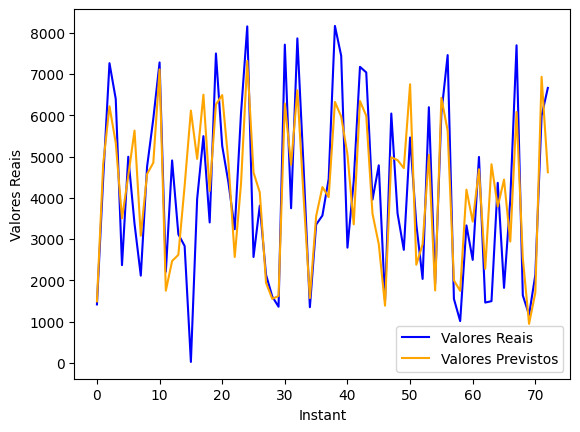

In [199]:
import matplotlib.pyplot as plt

# Certificando-se de que 'y_test' tem o mesmo tamanho de 'instant'
plt.plot( y_test, color='blue', label='Valores Reais')
plt.plot( y_pred, color='orange', label='Valores Previstos')


# Adicionando título e legendas
plt.xlabel('Instant')
plt.ylabel('Valores Reais')
plt.legend()
plt.legend()

plt.show()


